In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 66.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 66.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 112.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 48.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [4]:
data_train = pd.read_csv('/content/drive/MyDrive/waterQuality/wQuality.csv')

In [5]:
data_train.head(10)

,Unnamed: 0,text,corr,class
0,0,predatory white pointers dingos saltwatercrocs...,1,0
1,1,this january simply note that are still having...,1,0
2,2,pronouns hehim height zodiac sign leo smoke he...,1,0
3,3,pronouns hehim height zodiac sign sagittarius ...,1,0
4,4,hoses are inchworm water lilies are powderblue...,1,0
5,5,you spell trafalgar water law horribly,1,0
6,6,weve got fussy cat who will not use the tray i...,1,0
7,7,you are not getting meat she said whats the pr...,1,0
8,8,you look all the corruption cases waiting pros...,1,0
9,9,horrendous and dangerous clear out they need r...,1,0


In [6]:
import pandas as pd
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses

from tensorflow.keras.metrics import AUC

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(data_train['text'],\
                                                      data_train['corr'],\
                                                      test_size=0.3,\
                                                      random_state=0)

In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [9]:
# Building model with transformer
model_name = 'google/electra-small-discriminator'

trans = text.Transformer(model_name, maxlen=128)

In [10]:
# consider 30k comments
num_words = 30000

# convert texts to number format - for tensorflow.

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(data_train['text'].values.astype(str).tolist())

print(str(tokenizer.texts_to_sequences(['this is a test'])))

[[11, 23077, 23077, 710]]


In [11]:
# text-to-number
x_train = np.array( tokenizer.texts_to_sequences(X_train.values.astype(str)) )
x_test  = np.array( tokenizer.texts_to_sequences(X_test.values.astype(str)) )

<ipython-input-11-52717cdf9361>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array( tokenizer.texts_to_sequences(X_train.values.astype(str)) )
<ipython-input-11-52717cdf9361>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test  = np.array( tokenizer.texts_to_sequences(X_test.values.astype(str)) )


In [12]:
x_train = pad_sequences(x_train, padding='post', maxlen=128)
x_test = pad_sequences(x_test, padding='post', maxlen=128)

In [13]:
X_train = X_train.values.astype(str).tolist()
y_train = y_train.values.astype(str).tolist()

X_test = X_test.values.astype(str).tolist()
y_test = y_test.values.astype(str).tolist()

In [14]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 21
	95percentile : 40
	99percentile : 44


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 20
	95percentile : 40
	99percentile : 43


In [15]:
# getting electra-base model.
model = trans.get_classifier()

In [16]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/4
4527/4527 [==============================] - 339s 69ms/step - loss: 0.6920 - accuracy: 0.5234
Epoch 2/4
4527/4527 [==============================] - 315s 69ms/step - loss: 0.3741 - accuracy: 0.8358
Epoch 3/4
4527/4527 [==============================] - 310s 68ms/step - loss: 0.6949 - accuracy: 0.5071
Epoch 4/4
4527/4527 [==============================] - 302s 67ms/step - loss: 0.8669 - accuracy: 0.5016


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


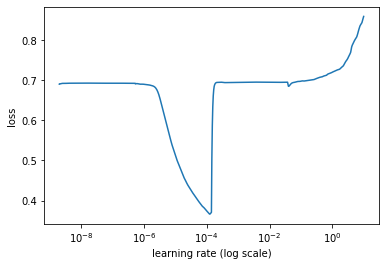

In [18]:
learner.lr_find(start_lr=2e-09, max_epochs=4)
learner.lr_plot()

In [19]:
history = learner.fit_onecycle(1e-4, 4)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/4
4528/4528 [==============================] - 344s 71ms/step - loss: 0.1953 - accuracy: 0.9201 - val_loss: 0.1127 - val_accuracy: 0.9478
Epoch 2/4
4528/4528 [==============================] - 326s 71ms/step - loss: 0.1384 - accuracy: 0.9433 - val_loss: 0.1601 - val_accuracy: 0.9375
Epoch 3/4
4528/4528 [==============================] - 333s 72ms/step - loss: 0.1201 - accuracy: 0.9465 - val_loss: 0.1158 - val_accuracy: 0.9510
Epoch 4/4
4528/4528 [==============================] - 330s 72ms/step - loss: 0.0908 - accuracy: 0.9634 - val_loss: 0.1145 - val_accuracy: 0.9535


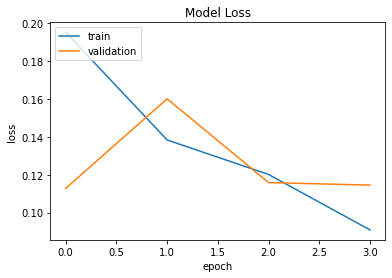

In [20]:
learner.plot('loss')

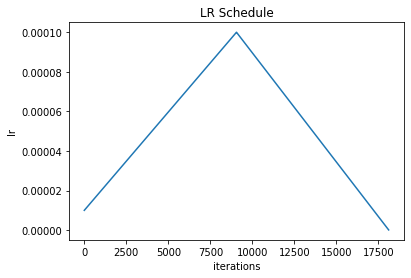

In [21]:
learner.plot('lr')

In [22]:
learner.validate()

364/364 [==============================] - 24s 59ms/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5733
           1       0.96      0.95      0.95      5909

    accuracy                           0.95     11642
   macro avg       0.95      0.95      0.95     11642
weighted avg       0.95      0.95      0.95     11642



array([[5508,  225],
       [ 316, 5593]])

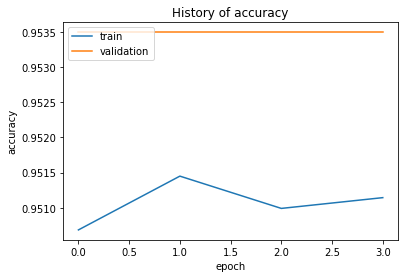

In [ ]:
learner.plot('accuracy')